### Universidade Federal do Rio Grande - FURG

### Escola de Engenharia - EE

### Programa de Pós-graduação em Engenharia Oceânica - PPGEO

### Disciplina: Confiabilidade em Engenharia

### Professor: Dr. Mauro de Vasconcellos Real

# __Aula 11__

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# __Capítulo 6 - Simulação numérica e o Método de Monte Carlo__ <a name="section_6"></a>

[6.1 - Introdução](#section_61)  
[6.2 - O essencial do Método de Simulações de Monte Carlo](#section_62)  
[6.3 - Geração de números aleatórios](#section_63)  
[6.4 - Determinação da probabilidade de falha através do Método de Monte Carlo](#section_64)   
[6.5 - Aplicações do Método de Monte Carlo](#section_65)   
[6.6 - Técnicas de redução de variância](#section_66)   
[6.7 - Amostragem por importância](#section_67)   

## __6.1 - Introdução__  <a name="section_61"></a>

* Simulação consiste em se tentar reproduzir o comportamento de um sistema através de um modelo físico ou matemático.

<img src="./images6/simulations.jpg" alt="Simulações numéricas" style="width:474px"/>

Fonte: https://www.researchgate.net/publication/333496524/figure/fig2/AS:764445592649728@1559269440601/Examples-of-the-models-theories-and-case-studies-in-the-accepted-papers_W640.jpg

* O progresso dos computadores digitais tem incentivado cada vez mais o uso de modelos numéricos.

* A resposta de um modelo depende de seus parâmetros de entrada.

* Se os parâmetros de entrada de um modelo são variáveis aleatórias, que possuem determinadas distribuições de probabilidade;

* Então, a resposta do modelo também será uma variável aleatória.

<img src="./images6/monte_carlo.jpg" alt="Simulações de Monte Carlo" style="width:474px"/>

* Apenas em alguns poucos casos é possível obter-se analiticamente a distribuição de probabilidade da resposta do sistema em função das distribuições de probabilidade das variáveis de entrada (ver Capítulo 4), como por exemplo no caso em que a função $Y$ é igual ao logaritmo neperiano de uma variável aleatória lognormal, conforme a figura abaixo.


<img src="./images6/lognormal.jpg" alt="Função logarítmica" style="width:800px"/>

* Em geral:
* As variáveis de entrada do sistema possuem distribuições de probabilidade as mais diversas. 
* A resposta do sistema é governada por uma função altamente não-linear.
* Não existe uma função $Y=g(X_1,X_2,...,X_n)$ na forma explícita.
* Então, não é possível obter-se uma solução analítica para a distribuição de probabilidade da resposta do sistema.
* Surge, então, a necessidade da utilização de métodos numéricos que permitam obter uma estimativa da forma da distribuição de probabilidade da resposta do sistema e seus principais momentos, em função das distribuições de probabilidade dos parâmetros de entrada.


* O __Método de Monte Carlo__ consiste basicamente em obter-se uma estimativa da distribuição de probabilidade da resposta de um sistema através das seguintes etapas:
1. Geração aleatória dos parâmetros de entrada, de acordo com as suas distribuições de probabilidade específicas;
2. Realização de inúmeras simulações com um modelo numérico a partir destes dados; 
3. Análise estatística das diversas respostas encontradas.

* A Figura abaixo ilustra o funcionamento do Método de Monte Carlo:

<img src="./images6/monte_carlo_fluxograma.jpg" alt="Fluxograma do Método de Monte Carlo" style="width:474px"/>

[Retornar ao início da aula](#section_6)

## __6.2 - O essencial do Método de Simulação de Monte Carlo__  <a name="section_62"></a>

* O princípio do Método de Monte Carlo é desenvolver um modelo numérico para representar o comportamento de um sistema de Engenharia.

<img src="./images6/modelo_plataforma.jpg" alt="Modelo de plataforma" style="width:600px"/>

Fonte: (a) https://en.wikipedia.org/wiki/File:Gulf_Offshore_Platform.jpg

* Se os parâmetros de entrada do modelo forem variáveis aleatórias, suas distribuições de probabilidade devem ser especificadas.

<img src="./images6/probability_distributions.jpg" alt="Distribuições de probabilidade" style="width:600px"/>

* Um conjunto de dados de entrada deve ser gerado aleatoriamente a partir das distribuições de probabilidade especificadas.

* Uma análise do sistema deve ser realizada através do modelo, utilizando os dados de entrada gerados aleatoriamente.  

* Cada análise do sistema é chamada de simulação.

<img src="./images6/entrada_modelo_saida.jpg" alt="Entrada-Modelo-Resposta" style="width:600px"/>

* As simulações são realizadas $n$ vezes.
* Em cada simulação são empregados dados de entrada aleatórios diferentes.
* No final tem-se uma amostra de $n$ respostas diferentes do sistema armazenada $(y_1, y_2,..., y_n)$.


<img src="./images6/resposta_aleatoria.jpg" alt="Resposta aleatória do sistema" style="width:474px"/>

* Análise estatística da resposta do sistema.

Média:

$$\mu_Y = \frac{1}{N}\sum_{i=1}^{n}y_i$$

Desvio padrão:

$$\sigma_Y = \sqrt{\sum_{i=1}^{n}\frac{(y_i-\mu_Y)^2}{n-1}}$$

* A precisão do Método de Monte Carlo depende do número $n$ de simulações realizadas!

* Quanto maior o número de simulações, maior o tempo de processamento numérico necessário.

#### Etapas do Método de Monte Carlo:

1. Elaborar um modelo matemático para o sistema: $Y = g(X_1, X_2,..., X_n)$.

2. Gerar um conjunto de dados de entrada aleatórios: $X = (X_1, X_2, ..., X_n)$

3. Realizar a análise do sistema através do modelo e armazenar as respostas: $Y =(Y_1, Y_2, ..., Y_n)$

4. Repetir os passos 2 e 3, para i =1 até N.

5. Analisar os resultados obtidos para a resposta do sistema usando histogramas, estatística descritiva (média, desvio-padrão,...), intervalos de confiança, etc.

[Retornar ao início da aula](#section_6)

## __6.3 - Geração de números aleatórios__  <a name="section_63"></a>

### 6.3.1 - Geração de números aleatórios de distribuição uniforme

* A utilização do Método de Monte Carlo está vinculada à capacidade de se gerar números aleatórios no computador.

* A geração de números aleatórios no computador normalmente está baseada em algoritmos recursivos capazes de gerar números uniformemente distribuídos entre $0$ e $1$. 

* Um dos algoritmos geradores de números aleatórios mais utilizados são os do tipo __gerador linear congruencial__. No entanto, a sequência de números fornecida por este tipo de gerador é, na realidade, determinística e reproduzível, dependendo apenas das constantes iniciais fornecidas ao gerador, por isto os números gerados por estes algoritmos são chamados de _pseudo-aleatórios_.

* No entanto, a maioria das linguagens de programação atuais possuem geradores de números aleatórios pré-definidos, que são capazes de gerar sequências de números aleatórios suficientemente grandes para as principais aplicações práticas. Maiores detalhes sobre a geração de números randômicos podem ser encontrados no livro de BECK, listado na bibliografia abaixo.

### 6.3.2 - Geração de números aleatórios - Técnica da Transformação Inversa

* O __Método da Transformação Inversa__ para a geração de números aleatórios segundo uma distribução qualquer $F_X(x)$ consiste de quatro passos:

1. Gerar um Gerar um número aleatório $u_i$, com distribuição uniforme entre $0$ e $1$.

2. Este número pode ser considerado como igual à própria distribuição de probabilidade acumulada $F_U(u_i)$ de uma distribuição uniforme: $F_U(u_i) = u_i$.

3. Igualar as probabilidades acumuladas: $F_X(x_i) = F_U(u_i)$

4. Determinar o valor de $x_i$ correspondente: $x_i = F_X^{-1}(u_i)$

Este procedimento é ilustrado na Figura abaixo.

<img src="./images6/transformacao_inversa.jpg" alt="Método da Transformação Inversa" style="width:800px"/>

Fonte: HALDAR, A. MAHADEVAN, S. Probability, reliability, and statistical methods in engineering design. New York, Wiley, 2000.

#### Exemplo 6.1 - Distribuição de Valores Extremos do Tipo I - Gumbel

* Se $Y_n$ é uma variável aleatória com distribuição de valores extremos do Tipo I (Gumbel) para valores máximos, então:

$$F_{Y_n}(y) = \exp{\left[-\exp{-\alpha_n(y - u_n)}\right]}$$

* Gerar números aleatórios com esta distribuição a partir do Método da Transformação Inversa:

1. Gerar um Gerar um número aleatório $u_i$, com distribuição uniforme entre $0$ e $1$.

2. Admitir que: $F_U(u_i) = u_i$.

3. Igualar as probabilidades acumuladas:

$$u_i = F_U(u_i) = F_{Y_n}(y_i)$$

$$u_i = F_U(u_i) = \exp{\left[-e^{-\alpha_n(y_i - u_n)}\right]}$$

4. Determinar o valor de $y_i$ correspondente: $y_i = F_{Y_n}^{-1}(u_i)$

$$\ln(u_i) = -e^{-\alpha_n(y - u_n)}$$

$$\ln\left[\frac{1}{\ln\left(\frac{1}{u_i}\right)}\right] = \alpha_n(y_i-u_i)$$

$$y_i = u_n + \frac{1}{\alpha_n}\ln\left[\frac{1}{\ln\left(\frac{1}{u_i}\right)}\right]$$ 


* Dados: $\mu_{Y_n} = 100$ e $\sigma_{Y_n} = 20$

* $u_n$ é o valor mais provável de $Y_n$ (moda).

* $\alpha_n$ é o inverso de uma medida de dispersão dos valores de $Y_n$.

$$u_n = \mu_{Y_n} - \frac{\gamma}{\alpha_n} = 90,9989$$

$$\alpha_n = \sqrt{\frac{\pi^2}{6\sigma_{Y_n}^2}} = 0,0641$$

* Onde $\gamma = 0,577216$ é o número de Euler.

* Fórmula geradora:

$$y_i = 90,9989 + \frac{1}{0,0641}\ln\left[\frac{1}{\ln\left(\frac{1}{u_i}\right)}\right]$$ 

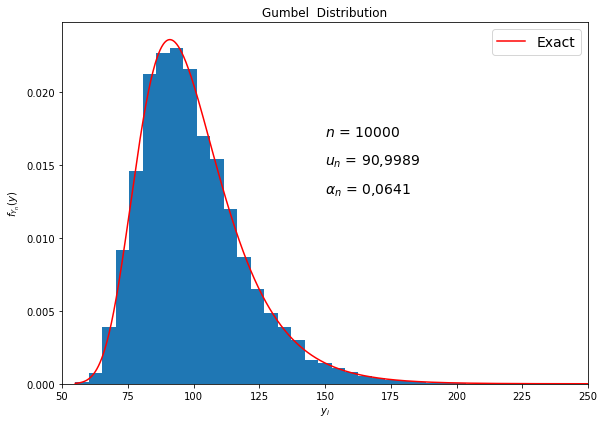

In [13]:
"""
Geração de números aleatórios com a distribuição de Gumbel
"""
# Dados de entrada
n = 10_000
mu_yn = 100.00 
sigma_yn = 20.00
gamma = 0.577216
# Parâmetros da distribuição de Gumbel
alpha_n = np.pi / (np.sqrt(6) * sigma_yn)
u_n = mu_yn - gamma / alpha_n
# Geração de números com distribuição uniforme entre 0 e 1
u_i = np.random.rand(n)
# Geração de número com distribuição de Gumbel
y_i = u_n + 1 / alpha_n * np.log(1 / np.log(1 / u_i))
# Histograma dos valores de yi
plt.figure(figsize=(8.5, 6))
fy = plt.hist(y_i, bins=40, density=True)
# Exact pdf for Gumbel
y = np.linspace(min(y_i),max(y_i), 1000)
pdf_y = alpha_n * np.exp(- alpha_n * (y - u_n))*np.exp(- np.exp(- alpha_n*(y - u_n)))
plt.plot(y, pdf_y, color='red', label="Exact")
plt.xlabel(r'$y_i$')
plt.ylabel(r'$f_{Y_n}(y)$')
plt.legend(loc='upper right', fontsize="14")
plt.title('Gumbel  Distribution')
plt.text(150, 0.017, r"$n$ = 10000", fontsize="14")
plt.text(150, 0.015, r"$u_n$ = 90,9989", fontsize="14")
plt.text(150, 0.013, r"$\alpha_n$ = 0,0641", fontsize="14")
plt.xlim(50, 250)
plt.tight_layout()
plt.show()

### 6.3.3 Geração de números aleatórios com distribuição conjunta

* Seja  $X_1, X_2, ..., X_n$ um conjunto de $n$ varáveis aleatórias.

#### Geração de variáveis estatisticamente independentes:

* Se as variáveis forem __estatisticamente independentes__, a função densidade de probabilidade conjunta será:

$$f_{X_1, X_2, ..., X_n}(x_1, x_2,..., x_n) = \prod_{i=1}^n f_{X_i}(x_i)$$

* Onde $f_{X_i}(x_i)$ é a função densidade marginal de $X_i$.

* No caso de variáveis aleatórias independentes os números randômicos podem ser gerados separadamente e independentemente para cada variável, usando o Método da Transformação Inversa, por exemplo:

* Para $i = 1$ até $n$: $x_i = F_{X_i}^{-1}(u_i)$

#### Geração de variáveis aleatórias correlacionadas:

* Se as variáveis $X_1, X_2, ..., X_n$ forem dependentes sua função densidade de probabilidade conjunta será dada por:

$$f_{X_1, X_2, ..., X_n}(x_1, x_2,..., x_n) = f_{X_1}(x_1) f_{X_2}(x_2|x_1)...f_{X_n}(x_n|x_1,x_2,...,x_{n-1})$$

Onde:

$f_{X_1}(x_1)$ é a função densidade de probabilidade marginal de $X_1$;

$f_{X_n}(x_n|x_1,x_2,...,x_{n-1}$ é a função densidade de probabilidade condicional $X_k$, dado que: $X_1 = x_1, X_2 = x_2,..., X_{k-1} = x_{k-1}$.

* A função densidade de probabilidade acumulada conjunta será:

$$F_{X_1, X_2, ..., X_n}(x_1, x_2,..., x_n) = F_{X_1}(x_1) F_{X_2}(x_2|x_1)...F_{X_n}(x_n|x_1,x_2,...,x_{n-1})$$

Onde:

$F_{X_1}(x_1)$ é a função densidade de probabilidade acumulada (FDPA) marginal de $X_1$;

$F_{X_n}(x_n|x_1,x_2,...,x_{n-1}$ é a função densidade de probabilidade acumulada (FDPA) condicional $X_k$, dado que: $X_1 = x_1, X_2 = x_2,..., X_{k-1} = x_{k-1}$.

* No caso de variáveis correlacionadas os números randômicos não podem ser gerados de forma independente para cada variável.

* Em primeiro lugar é necessários gerar um conjunto de números aleatórios de distribuição uniforme: $(u_1, u_2, ..., u_n)$

* O valor de $x_1$ pode ser determinado de forma independente: $x_1 = F_{X_1}(u_1)$
 
* Conhecido o valor de $x_1$, a função FDPA condicional de $X_2$: $F_{X_2}(x_2|x_1)$ será uma função somente de $x_2$. Portanto, $x_2$ pode ser obtido a partir de: $x_2 = F_{X_2}^{-1}(u_2|x_1)$

* Sucessivamente, com os valores $x_1, x_2,..., x_{k-1}$ já obtidos, determina-se o valor de $x_k$ através de: $x_{k} = F_{X_k}^{-1}(u_k|x_1, x_2,...,x_{k-1})$

* O conjunto de valores  $(x_1, x_2,..., x_n)$ das variáveis correlacionadas são obtidos, então, de forma recursiva.

* Este método será eficiente se as funções inversas de $F_{X_1}(x_1) \rightarrow x_1 = F_{X_1}^{-1}(u_1)$ e de $F_{X_k}(x_k|x_1,x_2,...,x_{k-1}) \rightarrow x_{k} = F_{X_k}^{-1}(u_k|x_1, x_2,...,x_{k-1})$, puderem ser obtidas de forma analítica. Como este usualmente não é o caso, é mais comum empregar-se o __Modelo de Nataf__ descrito a seguir.

### 6.3.4 - Modelo de Nataf

* O __Modelo de Nataf__ permite a geração de amostras de variáveis aleatórias correlacionadas, quando as distribuições de probabilidade condicionais necessárias a aplicação do método exposto no item 6.3.3 não estão disponíveis na forma analítica, ou quando suas funções inversas não podem ser obtidas de forma simples (BECK, 2019).

* O __Modelo de Nataf__ pode ser descrito através da aplicação dos seguintes passos:

1. Em primeiro lugar é gerada uma amostra de números aleatórios de distribuição normal padronizada, não correlacionados, de média zero e variância unitária, na forma de um vetor: $\textbf{y}_k =\{y_1,y_2,...,y_n\}_k^t$.

2. Monta-se uma matriz de correlação $\textbf{R}_\textbf{X}$, $n \times n$, entre as variáveis $X_1, X_2, ..., X_n$ dada na forma:


$$\textbf{R}_\textbf{X}=\left[\begin{array}{cccc} 1           & \rho_{X_{12}} & ...  & \rho_{X_{1n}} \\
                                            \rho_{X_{21}} & 1           & ... & \rho_{X_{2n}} \\
                                            ...         & ...         & ... & ...         \\
                                            \rho_{X_{n1}} & \rho_{X_{n2}} & ... & 1 \end{array}\right]$$
                                            
Onde: $\rho_{X_{ij}}$ é o coeficiente de correlação linear entre as variáveis $X_i$ e $X_j$, conforme mostrado  no Capítulo 4.

3. Através da __Transformação de Nataf__ (ver BECK, 2019) é possível transformar-se a matriz de correlação $\textbf{R}_\textbf{X}$ , entre as variáveis $X_1, X_2, ..., X_n$, na matriz de covariância $\textbf{C}_\textbf{Z}$ entre as variáveis normais padronizadas correlacionadas $Z_1, Z_2, ..., Z_n$, de média zero e variância unitária, equivalentes. Na prática os valores dos coeficientes de correlação linear entre as variáveis correlacionadas $X_i$ e $X_j$ são estabelecidos a partir de poucas observações experimentais ou através da experiência do analista com este tipo de dados. Além disso, os valores dos coeficientes de correlação linear obtidos a partir da __Transformação de Nataf__, designados por $\rho_{Z_{ij}}$, de um modo geral são muito próximos dos valores originais $\rho_{X_{ij}}$. Com base nestas duas constatações, na maioria dos casos práticos, é possível fazer-se:

$$\textbf{C}_Z \approxeq \textbf{R}_X$$



4. Através da __decomposição de Cholesky__ da matriz de covariância $\textbf{C}_\textbf{Z}$ é obtida uma matriz triangular inferior $\textbf{L}$, que é igual a matriz jacobiana $\textbf{J}_{zy}$, que permite transformar as variáveis normais padronizadas não correlacionadas $\textbf{y}_k$ nas variáveis normais padronizadas correlacionadas $\textbf{z}_k$:

$$\textbf{z}_k = \textbf{J}_{zy} \textbf{y}_k = \textbf{L}\textbf{ y}_k$$

5. Conhecida a amostra $\textbf{z}_k$ é possível obterem-se as probabilidades acumuladas correpondentes através de:

$$\textbf{u}_k = \{u_1, u_2, ..., u_n\}_k^t = \{\Phi(z_i)\}_{i=1, 2, ..., n}^t$$

6. A amostra de variáveis correlacionadas com distribuições quaisquer $\textbf{x}_k$ é obtida através da aplicação do __Método da Transformação Inversa__, a cada um dos elementos do vetor de probabilidades acumuladas $\textbf{u}_k$, na forma:

$$\textbf{x}_k = \{x_1, x_2, ..., x_n\}_k^t = \{F_X^{-1}(u_i)\}_{i=1,2,...,n}^t = \{F_X^{-1}\left[\Phi(z_i)\right]\}_{i=1,2,...,n}^t$$

#### Exemplo 6.2 - Variáveis aleatórias normais correlacionadas

* Sejam X e Y duas variáveis aleatórias de distribuição normal correlacionadas.

* A função densidade de probabilidade conjunta pode ser escrita na forma:

$$f_{XY}(x,y) = f_{Y|X}(y|x)f_X(x)$$

* Onde a função densidade de probabilidade marginal de $X$ é dada por:

$$f_X(x) = \frac{1}{\sqrt{2\pi}\sigma_X}\exp{\left[-\frac{1}{2}\left(\frac{x-\mu_X}{\sigma_X}\right)^2\right]}$$


* E a função densidade condicional conjunta é dada por:

$$f_{Y|X}(y|x) = \frac{1}{\sqrt{2\pi}\sigma_Y\sqrt{1-\rho^2}}\exp{\left\{-\frac{1}{2}\left[\frac{y-\mu_y-\rho\frac{\sigma_X}{\sigma_Y}(x-\mu_x)}{\sigma_Y\sqrt{1-\rho^2}}\right]^2\right\}}$$

* A média condicional de $Y$, se $X=x$, será:

$$E(Y|X=x)= y-\mu_y-\rho\frac{\sigma_X}{\sigma_Y}(x-\mu_x)$$

O desvio padrão condicional de $Y$, se $X=x$, será:

$$\sigma(Y|X=x) = \sigma_Y\sqrt{1-\rho^2}$$

##### Geração de variáveis normais correlacionadas:

1. Geram-se dois números aleatórios de distribuição uniforme $u_1$ e $u_2$.

2. O valor de x pode ser obtido a partir de:

$$ x = \mu_X + \sigma_X \sqrt{-2\ln(u_1)}\cos(2\pi u_2)$$

3. O valor de $y$ pode ser obtido a partir de :

$$ y = \mu_{Y|X} + \sigma_{Y|X}\sqrt{-2\ln(u_1)}\sin(2\pi u_2)$$

##### Exemplo:

* Dados:

* $mu_X = 150$ e $\sigma_X = 20$
* $mu_Y = 120$ e $\sigma_Y = 25$
* $\rho = 0,75$

* Solução:

$$x = 150 + 20\sqrt{-2\ln(u_1)}\cos(2\pi u_2)$$

$$\mu_{Y|X} = \mu_Y + \rho\frac{\sigma_Y}{\sigma_X}(x - \mu_X) = 120 + 0,75\frac{25}{20}(x-150)$$

$$\sigma_{Y|X} = \sigma_Y\sqrt{1-\rho^2} = 25\sqrt{1-0,75^2} = 16,5359$$

$$y = \mu_{Y|X} + 16,5359\sqrt{-2\ln(u_1)}\sin(2\pi u_2)$$

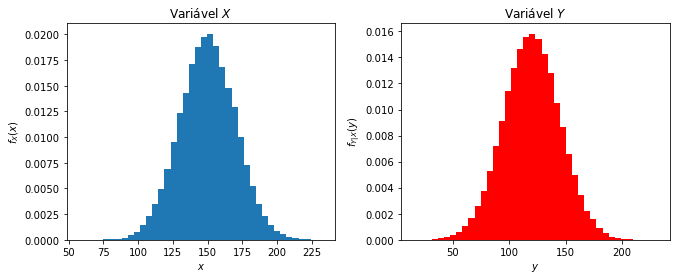

In [15]:
"""
Geração de variáveis normais correlacionadas
"""
#Dados de entrada:
n = 100000
mu_x = 150
sigma_x = 20
mu_y = 120
sigma_y = 25
rho = 0.75
# Geração de números randômicos de distribuição uniforme
u1 = np.random.rand(n)
u2 = np.random.rand(n)
# Geração de variáveis normais correlacionadas x e y
x = mu_x + sigma_x * np.sqrt(- 2 * np.log(u1)) * np.cos(2 * np.pi * u2)
mu_yx = mu_y + rho * sigma_y / sigma_x * (x - mu_x)
sigma_yx = sigma_y * np.sqrt(1 - rho ** 2)
y = mu_yx + sigma_yx * np.sqrt(- 2 * np.log(u1)) * np.sin(2 * np.pi * u2)
# Histogramas 
# Histograma dos valores de yi
plt.figure(1, figsize=(9.5, 4))
plt.subplot(1, 2, 1)
fx = plt.hist(x, bins=40, density=True)
plt.xlabel(r'$x$')
plt.ylabel(r'$f_{X}(x)$')
plt.title('Variável $X$')
plt.subplot(1, 2, 2)
fx = plt.hist(y, bins=40, density=True, color="red")
plt.xlabel(r'$y$')
plt.ylabel(r'$f_{Y|X}(y)$')
plt.title('Variável $Y$')
plt.tight_layout()
plt.show()

## __Bibliografia__

* __Livros__
* ANG,  A.  H-S.; TANG,  W. H.. Probability concepts in engineering planning and design. Volume I:  basic principles. New  York, John Wiley & Sons, 1975.
* ANG,  A.  H-S.; TANG,  W. H.. Probability concepts in engineering planning and design. Volume II: decision, risk and reliability. New  York, John Wiley & Sons, 1984.
* ANG,  A.  H-S.; TANG,  W. H.. Probability concepts in engineering: Emphasis on applications to Civil and Enviromental Engineering.  2nd ed. Hoboken, NJ, John Wiley & Sons, 2007.
* BECK, A. T. Confiabilidade e segurança das  estruturas. Rio de Janeiro, Elsevier, 2019.
* HALDAR, A. MAHADEVAN, S. Probability, reliability, and statistical methods in engineering design. New York, Wiley, 2000.
* MELCHERS, R.E., BECK, A. T.; Structural reliability analysis and prediction. 3rd ed. John Wiley and Sons, 2018, 514p.